# 1. Import Necessasary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
news_data = pd.read_csv('NewspaperData.csv')
news_data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


# 3.Data Understanding

##### 3.1 Initial Analysis

In [3]:
news_data.shape

(34, 3)

In [4]:
news_data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
news_data.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

### 3.2 Assumptions check

##### 1. Linearity Test

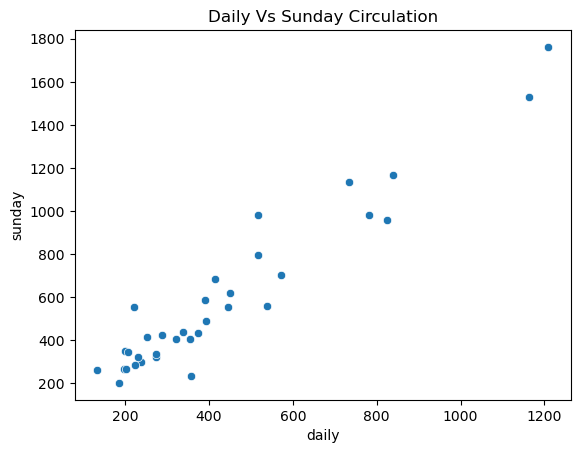

In [6]:
sns.scatterplot(x = 'daily', y = 'sunday' ,data=news_data)
plt.title('Daily Vs Sunday Circulation')
plt.show()

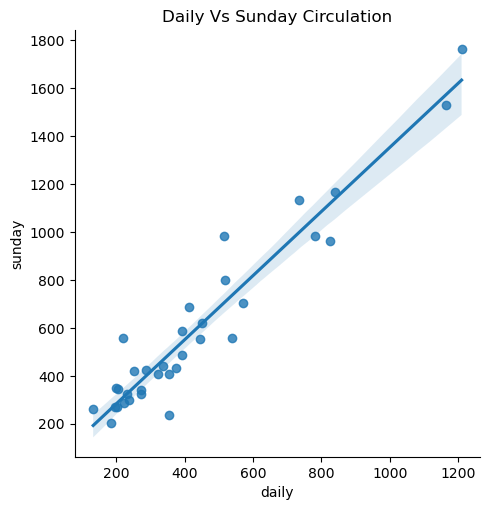

In [7]:
sns.lmplot(x = 'daily', y = 'sunday' ,data=news_data)
plt.title('Daily Vs Sunday Circulation')
plt.show()

##### 2. Normality Test

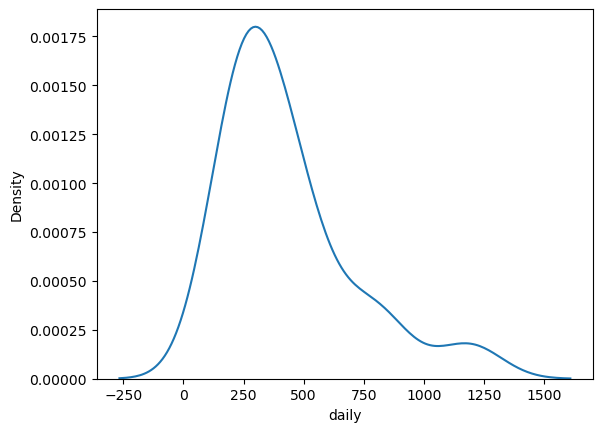

In [8]:
sns.distplot(a = news_data['daily'],hist=False)
plt.show()

In [9]:
news_data['daily'].skew()

1.5321591323040094

##### 3. MultiCollinearity Check

###### It Can be Performed using

1. Correlation Matrix
2. Variance Inflation Factor(VIF)

##### 4. No Autoregression
#### There is no time based input in my input features

##### 5. Homoscadascity Check | 6 Zero Residual Mean Check

##### Note: These 2 Tests can be performed post model Training

# 4. Data Preparation

In [10]:
del news_data['Newspaper']

In [11]:
news_data.dtypes

daily     float64
sunday    float64
dtype: object

In [12]:
news_data.isna().sum()

daily     0
sunday    0
dtype: int64

##### Note:
######     Linear Regression can be build using 2 libraries:
         1. using Statsmodels Library
         2. Using sklearn Library

## 1. Using Statsmodel

If statsmodel, Model building and model training will happen at the same time using OLS Technique(Ordinary List Square).

#### 5.Model Building | 6. Model Training

In [ ]:
!pip  install statsmodels

In [13]:
import statsmodels.formula.api as smf

In [14]:
linear_model = smf.ols(formula = 'sunday~daily', data = news_data).fit() #model building and model Training
linear_model

In [15]:
linear_model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [16]:
# 7. Model Testing

# Manual Calculation

In [17]:
# y = mx + c
# if x = 200 , y = ?
(1.339715*200) + 13.835630

281.77862999999996

In [18]:
# if x = 300 , y = ?
(1.339715*300) + 13.835630

415.75012999999996

In [32]:
pred=linear_model.predict()
pred

array([ 538.93950861,  706.44270505,  490.27570976,  333.43128393,
        734.3074323 ,  996.88482623,  280.21379461,  352.27973085,
        290.0901718 ,  323.54686845,  616.37904075,  400.43845725,
        262.66889014, 1573.78341718,  609.4473566 ,  566.96500163,
        378.61316413, 1061.21926861, 1633.85220777, 1119.78623895,
        313.59412751,  489.22403367,  704.48940094,  309.19584396,
        466.21979157,  277.92020294,  192.33788451,  514.90100672,
        380.70847801,  777.96069796,  538.04725858,  284.2704509 ,
        444.72272856, 1137.72501956])

In [31]:
error=news_data.sunday-pred
error

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
Name: sunday, dtype: float64

In [22]:
#8. Model Evaluation

In [23]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           6.02e-19
Time:                        11:13:21   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# test_data = pd.DataFrame(data={'daily':[256.78,398.56,653.98,444.19,985.12]})
test_data = pd.DataFrame(data={'daily':[391.952,516.981,355.628,238.555]})
test_data

,daily
0,391.952
1,516.981
2,355.628
3,238.555


In [41]:
linear_model.predict(test_data.daily)

0    538.939509
1    706.442705
2    490.275710
3    333.431284
dtype: float64